In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mushrooms = pd.read_csv("C://Users//raman//Downloads//train.csv")

In [4]:
mushrooms.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
mushrooms.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
mushrooms['class'].unique()

array(['e', 'p'], dtype=object)

In [7]:
mushrooms['cap-diameter'].astype(float)

0          8.80
1          4.51
2          6.94
3          3.88
4          5.85
           ... 
1048570    3.33
1048571    5.91
1048572    4.20
1048573    7.54
1048574    8.57
Name: cap-diameter, Length: 1048575, dtype: float64

#Data Cleaning 
The code is values not given would not be able to check the same.
When a column of pandas is addressed it can be treated as series and any condition would check the index as it is akin to a dictionary, use values instead.

In [8]:
# Assuming 'mushrooms' is your DataFrame
i_list = {}
for i in mushrooms.columns:
    if mushrooms[i].dtype == object :
        i_list[i] = mushrooms[i].value_counts().to_dict()
        print(i_list[i])      

{'p': 574086, 'e': 474489}
{'x': 482903, 'f': 227455, 's': 122816, 'b': 107605, 'o': 36527, 'p': 35902, 'c': 35196, 'd': 25, 'e': 13, 'w': 13, 't': 12, 'r': 12, 'y': 11, 'g': 11, 'n': 11, 'z': 9, 'l': 7, 'a': 7, 'u': 4, '24.16': 1, '8': 1, '6 x': 1, 'ring-type': 1, 'm': 1, '21.56': 1, '10.13': 1, 'is p': 1, 'i': 1, '2.85': 1, '3.6': 1, '4.22': 1, 'is s': 1, '3.55': 1, '7 x': 1, '5 f': 1, '19.29': 1, 'k': 1, '7.43': 1}
{'t': 155187, 's': 129176, 'y': 110380, 'h': 95531, 'g': 88347, 'd': 69905, 'k': 43148, 'e': 40371, 'i': 38399, 'w': 37124, 'l': 15108, 'n': 33, 'p': 25, 'f': 22, 'a': 18, 'o': 17, 'm': 13, 'u': 12, 'r': 11, 'x': 8, 'b': 7, 'c': 6, 'z': 5, 'has-ring': 2, 'does h': 1, '1.42': 1, 'class': 1, '4.66': 1, '8.1': 1, 'has h': 1, '11.78': 1, 'veil-color': 1, '4.21': 1, '16.39': 1, '3.06': 1, '23.18': 1, 'cap-diameter': 1, '6.45': 1, '12.79': 1, '6.57': 1, '0.85': 1, 'does t': 1, 'is h': 1, '7.14': 1, '1.43': 1, '5.07': 1, 'does l': 1, '2.7': 1, '15.94': 1, 'does None': 1}
{'n': 4

# Dict Comprehension: {key_expression: value_expression for item in iterable if condition}

# List Expression: [expression for item in iterable if condition]


In [9]:
filtered_i_list = {col: {value: count for value, count in counts.items() if count >= 10} for col, counts in i_list.items()}

print(filtered_i_list)

{'class': {'p': 574086, 'e': 474489}, 'cap-shape': {'x': 482903, 'f': 227455, 's': 122816, 'b': 107605, 'o': 36527, 'p': 35902, 'c': 35196, 'd': 25, 'e': 13, 'w': 13, 't': 12, 'r': 12, 'y': 11, 'g': 11, 'n': 11}, 'cap-surface': {'t': 155187, 's': 129176, 'y': 110380, 'h': 95531, 'g': 88347, 'd': 69905, 'k': 43148, 'e': 40371, 'i': 38399, 'w': 37124, 'l': 15108, 'n': 33, 'p': 25, 'f': 22, 'a': 18, 'o': 17, 'm': 13, 'u': 12, 'r': 11}, 'cap-color': {'n': 457296, 'y': 130308, 'w': 127726, 'g': 70879, 'e': 66235, 'o': 60060, 'p': 31132, 'r': 26260, 'u': 24562, 'b': 20642, 'k': 20031, 'l': 13315, 'd': 20, 'f': 19, 'h': 11}, 'does-bruise-or-bleed': {'f': 864524, 't': 184013}, 'gill-attachment': {'a': 217299, 'd': 198093, 'x': 121386, 'e': 101561, 's': 99581, 'p': 93886, 'f': 40255, 'c': 26, 't': 18, 'u': 16, 'k': 14, 'g': 12, 'w': 11, 'b': 10}, 'gill-spacing': {'c': 448920, 'd': 136998, 'f': 40078, 'e': 11, 'a': 10}, 'gill-color': {'w': 313049, 'n': 182928, 'y': 158279, 'p': 115654, 'g': 7136

In [10]:
filtered_col = list(filtered_i_list.keys())

In [11]:
for i in filtered_col:
    mushrooms[i] = mushrooms[i].apply(lambda x: x if x in filtered_i_list[i].keys() else np.nan)

In [12]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,NaN,n,...,NaN,NaN,w,NaN,NaN,t,NaN,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,NaN,NaN,f,f,NaN,l,a
1048572,1048572,e,4.20,x,NaN,n,f,x,c,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u


In [13]:
for i in mushrooms.columns:
    print(i)
    print(mushrooms[i].unique())

id
[      0       1       2 ... 1048572 1048573 1048574]
class
['e' 'p']
cap-diameter
[ 8.8   4.51  6.94 ... 27.83 21.06 44.94]
cap-shape
['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 't' 'g' 'r' 'y']
cap-surface
['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' 'f' 'n' 'r' 'o' 'a' 'u'
 'p' 'm']
cap-color
['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' nan 'h' 'd' 'f']
does-bruise-or-bleed
['f' 't' nan]
gill-attachment
['a' 'x' 's' 'd' 'e' nan 'f' 'p' 'b' 'g' 'u' 't' 'c' 'w' 'k']
gill-spacing
['c' nan 'd' 'f' 'a' 'e']
gill-color
['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'd' 't' nan 's' 'l']
stem-height
[ 4.51  4.79  6.85 ... 21.21 24.67 25.7 ]
stem-width
[15.39  6.48  9.93 ... 74.37 71.4  65.75]
stem-root
[nan 'b' 'c' 'r' 's' 'f']
stem-surface
[nan 'y' 's' 't' 'g' 'h' 'k' 'i' 'f' 'd' 'x' 'w' 'n' 'e' 'p']
stem-color
['w' 'o' 'n' 'y' 'e' 'u' 'p' 'f' 'g' 'r' 'k' 'l' 'b' nan 't' 'a' 's']
veil-type
[nan 'u']
veil-color
[nan 'n' 'w' 'k' 'y' 'e' 'u']
has-ring
['f' 't' nan]
ring-type

In [14]:
filtered_col

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [15]:
mushrooms.isna().sum()


id                           0
class                        0
cap-diameter                 1
cap-shape                   63
cap-surface             225748
cap-color                   79
does-bruise-or-bleed        38
gill-attachment         176407
gill-spacing            422558
gill-color                  88
stem-height                  0
stem-width                   0
stem-root               927445
stem-surface            666600
stem-color                  48
veil-type               995081
veil-color              922234
has-ring                    47
ring-type                43275
spore-print-color       958869
habitat                     64
season                       0
dtype: int64

In [16]:
for i in mushrooms.columns:
    if mushrooms[i].dtype == object:
        mushrooms[i].astype('str')

In [17]:
mushrooms.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestClassifier
t = RandomForestClassifier(criterion='gini', max_depth=5)

In [19]:
Y_tree = mushrooms['class']
X_tree = mushrooms.iloc[:,2:]

In [20]:
X_tree.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [29]:
!pip install category_encoders

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ---------------------------------------- 81.9/81.9 kB 1.2 MB/s eta 0:00:00
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/9.8 MB 15.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/9.8 MB 16.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.8 MB 15.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/9.8 MB 15.5 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.8 MB 15.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.8 MB 14.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.6/9.8 MB 15.4 MB/s eta 0:00:01
   ---------------------- ----------------- 5.4/9.8 

In [21]:
Y_tree = [1.0 if x == 'p' else 0.0 for x in Y_tree]

In [22]:
import category_encoders as ce

# Initialize the LabelEncoder
encoder = ce.TargetEncoder(handle_missing='return_nan')

# List of columns to encode
columns_to_encode = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
                     'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 
                     'stem-surface', 'stem-color', 'veil-type', 'veil-color', 
                     'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    X_tree[column] = encoder.fit_transform(X_tree[column], Y_tree)

print(X_tree.head())


   cap-diameter  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0          8.80   0.513095     0.369844   0.536723              0.556411   
1          4.51   0.510076     0.470319   0.717066              0.556411   
2          6.94   0.513095     0.369844   0.124407              0.556411   
3          3.88   0.513095     0.463399   0.412816              0.556411   
4          5.85   0.510076     0.425933   0.498144              0.556411   

   gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0         0.647458      0.572957    0.428834         4.51       15.39   
1         0.647458      0.572957    0.715008         4.79        6.48   
2         0.537764      0.572957    0.428834         6.85        9.93   
3         0.590976           NaN    0.483781         4.16        6.53   
4         0.571620           NaN    0.428834         3.37        8.36   

   stem-root  stem-surface  stem-color  veil-type  veil-color  has-ring  \
0        NaN           NaN   

In [23]:
X_tree.isna().sum()

cap-diameter                 1
cap-shape                   63
cap-surface             225748
cap-color                   79
does-bruise-or-bleed        38
gill-attachment         176407
gill-spacing            422558
gill-color                  88
stem-height                  0
stem-width                   0
stem-root               927445
stem-surface            666600
stem-color                  48
veil-type               995081
veil-color              922234
has-ring                    47
ring-type                43275
spore-print-color       958869
habitat                     64
season                       0
dtype: int64

In [24]:
p = t.fit(X_tree,Y_tree)

In [25]:
p

RandomForestClassifier(max_depth=5)

In [26]:
h = p.feature_importances_
l = pd.DataFrame({
    'Feature': X_tree.columns,
    'Importance': h
})

In [27]:
l.sort_values(by = 'Importance')

,Feature,Importance
13,veil-type,0.000000
4,does-bruise-or-bleed,0.009888
15,has-ring,0.010209
17,spore-print-color,0.016537
19,season,0.017567
14,veil-color,0.017687
18,habitat,0.021419
1,cap-shape,0.027548
10,stem-root,0.032835
8,stem-height,0.036039


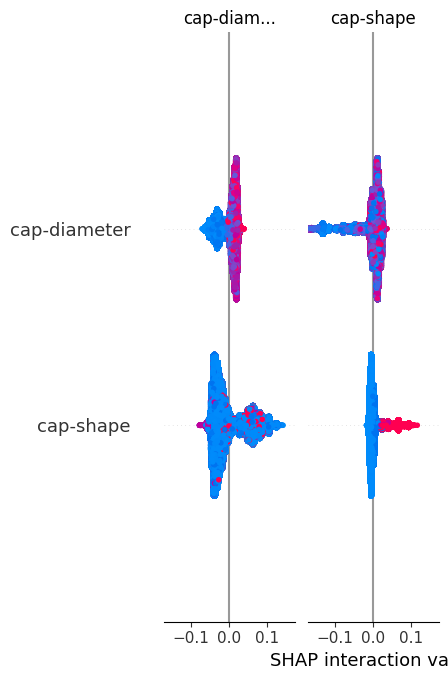

In [31]:
import shap

explainer = shap.TreeExplainer(t)
shap_values = explainer.shap_values(X_tree)
shap.summary_plot(shap_values, X_tree)




In [32]:
X_tree

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.80,0.513095,0.369844,0.536723,0.556411,0.647458,0.572957,0.428834,4.51,15.39,NaN,NaN,0.417740,NaN,NaN,0.533619,0.547048,NaN,0.529012,0.572072
1,4.51,0.510076,0.470319,0.717066,0.556411,0.647458,0.572957,0.715008,4.79,6.48,NaN,0.701264,0.599072,NaN,NaN,0.591427,0.996278,NaN,0.529012,0.347152
2,6.94,0.513095,0.369844,0.124407,0.556411,0.537764,0.572957,0.428834,6.85,9.93,NaN,0.395074,0.611603,NaN,NaN,0.533619,0.547048,NaN,0.392320,0.347152
3,3.88,0.513095,0.463399,0.412816,0.556411,0.590976,NaN,0.483781,4.16,6.53,NaN,NaN,0.417740,NaN,NaN,0.533619,0.547048,NaN,0.529012,0.582955
4,5.85,0.510076,0.425933,0.498144,0.556411,0.571620,NaN,0.428834,3.37,8.36,NaN,NaN,0.417740,NaN,NaN,0.533619,0.547048,NaN,0.675535,0.572072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3.33,0.772882,0.643913,0.490610,0.556411,0.647458,NaN,0.715008,9.51,6.54,NaN,NaN,0.417740,NaN,NaN,0.591427,NaN,0.825282,0.675535,0.582955
1048571,5.91,0.513095,0.369844,0.490610,0.556411,0.590976,0.572957,0.428834,5.32,9.63,0.353458,0.638891,0.611603,NaN,NaN,0.533619,0.547048,NaN,0.392320,0.572072
1048572,4.20,0.510076,NaN,0.490610,0.556411,0.537764,0.572957,0.428834,8.15,9.90,0.353458,NaN,0.417740,NaN,NaN,0.533619,0.547048,NaN,0.529012,0.582955
1048573,7.54,0.513095,0.369844,0.536723,0.556411,0.647458,0.572957,0.428834,4.58,15.09,NaN,NaN,0.417740,NaN,NaN,0.533619,0.547048,NaN,0.529012,0.582955


In [33]:
from sklearn.impute import KNNImputer
imp = KNNImputer()

In [ ]:
X_tree = imp.fit_transform(X_tree)

In [20]:
mushrooms['id'].astype(int)

0                0
1                1
2                2
3                3
4                4
            ...   
1048570    1048570
1048571    1048571
1048572    1048572
1048573    1048573
1048574    1048574
Name: id, Length: 1048575, dtype: int32

In [25]:
columns_float = []
for i in mushrooms.columns:
    if mushrooms[i].dtype != object:
        columns_float.append(i)

In [27]:
columns_object = []
for i in mushrooms.columns:
    if mushrooms[i].dtype == object:
        columns_object.append(i)

In [28]:
columns_object

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [29]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,NaN,n,...,NaN,NaN,w,NaN,NaN,t,NaN,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,NaN,NaN,f,f,NaN,l,a
1048572,1048572,e,4.20,x,NaN,n,f,x,c,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u


In [30]:
mushrooms[mushrooms['gill-spacing'].notna()]

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,g,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,1048569,e,6.58,f,s,n,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,a
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,NaN,NaN,f,f,NaN,l,a
1048572,1048572,e,4.20,x,NaN,n,f,x,c,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u


In [31]:
mushrooms.isna().sum()

id                           0
class                        0
cap-diameter                 1
cap-shape                   63
cap-surface             225748
cap-color                   79
does-bruise-or-bleed        38
gill-attachment         176407
gill-spacing            422558
gill-color                  88
stem-height                  0
stem-width                   0
stem-root               927445
stem-surface            666600
stem-color                  48
veil-type               995081
veil-color              922234
has-ring                    47
ring-type                43275
spore-print-color       958869
habitat                     64
season                       0
dtype: int64

In [32]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,NaN,n,...,NaN,NaN,w,NaN,NaN,t,NaN,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,NaN,NaN,f,f,NaN,l,a
1048572,1048572,e,4.20,x,NaN,n,f,x,c,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u


In [33]:
mushrooms['cap-diameter'].fillna(0, inplace = True)

C:\Users\raman\AppData\Local\Temp\ipykernel_16292\1240335971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mushrooms['cap-diameter'].fillna(0, inplace = True)


In [34]:
mushrooms.fillna('Missing',inplace = True)

In [35]:
poisnous = mushrooms[mushrooms['class']=='p']

In [36]:
poisnous

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1,1,p,4.51,x,h,o,f,a,c,n,...,Missing,y,o,Missing,Missing,t,z,Missing,d,w
5,5,p,4.30,x,t,n,f,s,c,n,...,Missing,Missing,w,Missing,n,t,z,Missing,d,a
7,7,p,4.55,x,e,e,f,a,Missing,y,...,Missing,Missing,y,Missing,w,t,z,Missing,d,a
8,8,p,7.36,f,h,e,f,x,d,w,...,b,Missing,w,Missing,Missing,f,f,Missing,d,a
14,14,p,3.91,b,t,n,f,Missing,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048564,1048564,p,5.94,f,t,n,f,x,c,y,...,Missing,Missing,y,Missing,Missing,f,f,Missing,d,a
1048566,1048566,p,5.98,x,i,e,f,e,Missing,y,...,Missing,Missing,y,Missing,Missing,f,f,Missing,g,u
1048567,1048567,p,5.32,x,Missing,w,f,Missing,c,w,...,Missing,Missing,y,Missing,Missing,f,f,Missing,d,a
1048570,1048570,p,3.33,b,t,n,f,a,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u


In [37]:
poisnous['cap-diameter'].mean()

5.6242743421717325

In [38]:
poisnous['cap-diameter'].median()

4.68

In [39]:
edible = mushrooms[mushrooms['class']=='e']

In [40]:
edible['cap-diameter'].mean()

7.136056262632009

In [41]:
edible['cap-diameter'].median()

6.52

In [42]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Missing,y,o,Missing,Missing,t,z,Missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Missing,s,n,Missing,Missing,f,f,Missing,l,w
3,3,e,3.88,f,y,g,f,s,Missing,g,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u
4,4,e,5.85,x,l,w,f,d,Missing,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,Missing,Missing,f,f,Missing,l,a
1048572,1048572,e,4.20,x,Missing,n,f,x,c,w,...,b,Missing,w,Missing,Missing,f,f,Missing,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u


In [44]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [45]:
for i in mushrooms.columns:
    if mushrooms[i].dtype == object:
        layout = go.Layout(title = f'Poisnous/edible-{i}',xaxis = dict(title=f'feature name {i}'),
                           yaxis = dict(title='Count'),hovermode = 'closest'
                           )
        trace0 = go.Bar(x=edible[i],y=edible[i].value_counts(), name = 'edible', marker = {'color':'blue'})
        trace1 = go.Bar(x=poisnous[i],y=poisnous[i].value_counts(), name = 'poisnous', marker = {'color':'red'})
        data = [trace0, trace1]
        fig = go.Figure(data = data, layout = layout)
        pyo.plot(fig)

In [46]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Missing,y,o,Missing,Missing,t,z,Missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Missing,s,n,Missing,Missing,f,f,Missing,l,w
3,3,e,3.88,f,y,g,f,s,Missing,g,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u
4,4,e,5.85,x,l,w,f,d,Missing,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,Missing,Missing,f,f,Missing,l,a
1048572,1048572,e,4.20,x,Missing,n,f,x,c,w,...,b,Missing,w,Missing,Missing,f,f,Missing,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u


In [47]:
#mushrooms['cap-diameter'] = mushrooms['cap-diameter'].fillna(mushrooms['cap-diameter'].mean())

In [48]:
mushrooms.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [49]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Missing,y,o,Missing,Missing,t,z,Missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Missing,s,n,Missing,Missing,f,f,Missing,l,w
3,3,e,3.88,f,y,g,f,s,Missing,g,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u
4,4,e,5.85,x,l,w,f,d,Missing,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,Missing,Missing,f,f,Missing,l,a
1048572,1048572,e,4.20,x,Missing,n,f,x,c,w,...,b,Missing,w,Missing,Missing,f,f,Missing,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u


In [50]:
for i in mushrooms.columns:
    if mushrooms[i].dtype == object:
        layout = go.Layout(title = f'Poisnous/edible-{i}',xaxis = dict(title=f'feature name {i}'),
                           yaxis = dict(title='Count'),hovermode = 'closest'
                           )
        trace0 = go.Bar(x=mushrooms[i],y=mushrooms[i][mushrooms['class']=='e'].value_counts(), name = 'edible', marker = {'color':'blue'})
        trace1 = go.Bar(x=mushrooms[i],y=mushrooms[i][mushrooms['class']=='p'].value_counts(), name = 'poisnous', marker = {'color':'red'})

        data = [trace0,trace1]
        fig = go.Figure(data = data, layout = layout)
        pyo.plot(fig)

In [94]:
mushrooms.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [51]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Missing,y,o,Missing,Missing,t,z,Missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Missing,s,n,Missing,Missing,f,f,Missing,l,w
3,3,e,3.88,f,y,g,f,s,Missing,g,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u
4,4,e,5.85,x,l,w,f,d,Missing,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,Missing,Missing,f,f,Missing,l,a
1048572,1048572,e,4.20,x,Missing,n,f,x,c,w,...,b,Missing,w,Missing,Missing,f,f,Missing,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u


In [52]:
mushrooms

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,Missing,y,o,Missing,Missing,t,z,Missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,Missing,s,n,Missing,Missing,f,f,Missing,l,w
3,3,e,3.88,f,y,g,f,s,Missing,g,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u
4,4,e,5.85,x,l,w,f,d,Missing,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,p,3.33,b,t,n,f,a,Missing,n,...,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
1048571,1048571,e,5.91,f,s,n,f,s,c,w,...,b,i,n,Missing,Missing,f,f,Missing,l,a
1048572,1048572,e,4.20,x,Missing,n,f,x,c,w,...,b,Missing,w,Missing,Missing,f,f,Missing,d,u
1048573,1048573,e,7.54,f,s,u,f,a,c,w,...,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u


In [53]:
from sklearn.pipeline import make_pipeline

In [54]:
from sklearn.preprocessing import TargetEncoder

In [55]:
Y = mushrooms['class'].apply(lambda x: 1 if x=='p' else 0)
X = mushrooms.iloc[:,2:]
   

In [95]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,Missing,Missing,w,Missing,Missing,f,f,Missing,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,Missing,y,o,Missing,Missing,t,z,Missing,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,Missing,s,n,Missing,Missing,f,f,Missing,l,w
3,3.88,f,y,g,f,s,Missing,g,4.16,6.53,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u
4,5.85,x,l,w,f,d,Missing,w,3.37,8.36,Missing,Missing,w,Missing,Missing,f,f,Missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3.33,b,t,n,f,a,Missing,n,9.51,6.54,Missing,Missing,w,Missing,Missing,t,Missing,k,g,u
1048571,5.91,f,s,n,f,s,c,w,5.32,9.63,b,i,n,Missing,Missing,f,f,Missing,l,a
1048572,4.20,x,Missing,n,f,x,c,w,8.15,9.90,b,Missing,w,Missing,Missing,f,f,Missing,d,u
1048573,7.54,f,s,u,f,a,c,w,4.58,15.09,Missing,Missing,w,Missing,Missing,f,f,Missing,d,u


In [56]:
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

mc_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,         # Number of leaves in one tree
    'learning_rate': 0.05,
      # Randomly select a fraction of features to build each tree
}

In [57]:
pipeline = make_pipeline(TargetEncoder(smooth = 'auto'), LGBMClassifier(**params))
scores = cross_val_score(pipeline, X, Y, cv=mc_cv)


[LightGBM] [Info] Number of positive: 459032, number of negative: 379828
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1456
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547209 -> initscore=0.189401
[LightGBM] [Info] Start training from score 0.189401
[LightGBM] [Info] Number of positive: 459338, number of negative: 379522
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547574 -> initscore=0.190874

In [58]:
scores

array([0.9739599 , 0.97355459, 0.97313497, 0.97360704, 0.9731159 ,
       0.97567651, 0.97458932, 0.97453687, 0.97400281, 0.97344491])